# <center>***Big Data***</center>
# <center>***Lab N°2: Spark***</center>

<center> © ENSIAS - IDSIT - Novembre 2023</center>




---





#I.   Spark Basics



Spark applications run as independent sets of processes on a cluster, coordinated by the SparkContext object in your main program (called the driver program).

Specifically, to run on a cluster, the SparkContext can connect to several types of cluster managers (either Spark’s own standalone cluster manager, Mesos, YARN or Kubernetes), which allocate resources across applications. Once connected, Spark acquires executors on nodes in the cluster, which are processes that run computations and store data for your application. Next, it sends your application code (defined by JAR or Python files passed to SparkContext) to the executors. Finally, SparkContext sends tasks to the executors to run.

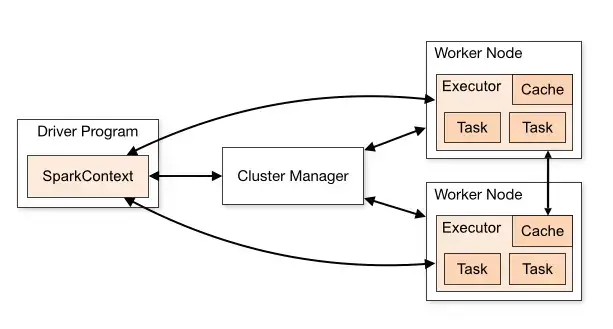

PySpark is a python API for Spark. It can be exploited  for local usage or as a client to connect to a cluster instead of setting up a cluster itself. PySpark is included in the official releases of Spark available in the Apache Spark website.

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f7c7137ba8c70ca8c0a65c7246c7d7f6ed24cac2f5ac7d6f414a8732c651ef9a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


The code below allows to run Spark locally with one worker thread (that is, no parallelism)

In [2]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

#conf = (SparkConf().setAppName("example_1").setMaster('local'))
# # To run Spark locally with K worker threads. (Ideally, set this to the number of cores on your host.):
conf = (SparkConf().setAppName("MyApp"))
# # To run spark using a YARN cluster manage:
# conf = (SparkConf().setAppName("example_3").setMaster('yarn').set('spark.driver.memory', '1G'))

sc = SparkContext(conf=conf)
spark = SparkSession(sc)
spark

The instructions below return the wordcount results for the text in Hello.txt

In [3]:

import re
from operator import add

#parallelisation
#lines = spark.read.text("file:///home/starias/Downloads/Hello.txt").rdd.map(lambda r: r[0].lower())



# Loading the log file
#log_file = sc.textFile("file:///home/starias/Downloads/Hello.txt")
#parallelisation
lines = spark.read.text("Hello.txt").rdd.map(lambda r: r[0].lower())
#print(lines)

counts = lines.flatMap(lambda x: re.split(r'[_:-;,.\s]\s*|\'|’|“|"|\s+|(|) ', x)).map(lambda x: (x, 1)).reduceByKey(add)
output = counts.collect()
for (word, count) in output:
  print("%s: %i" % (word, count))

hello: 5
None: 12
world: 2
spark: 3
and: 2
python: 3
are: 1
powerful: 1
again: 1


In [ ]:
#spark.stop()

***Complete the lab 1 and get data form speech.txt located in wordcount folder of HDFS file system. To ensure communication between both sessions of lab1 and lab2, you must get the server address of lab1 and replace localhost by this address in the HDFS path of the file speech.txt***



#II.   Spark Streaming (DStreams)


Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. Data can be ingested from many sources like Kafka, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window. Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply Spark’s machine learning and graph processing algorithms on data streams.

Spark Streaming is the previous generation of Spark’s streaming engine. There are no longer updates to Spark Streaming and it’s a legacy project. There is a newer and easier to use streaming engine in Spark called Structured Streaming. You should use Spark Structured Streaming for your streaming applications and pipelines. [**See Structured Streaming Programming Guide**](https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html).


Below is a basic example of using spark streaming to retrieve data sent over the network via a socket managed by a python server



In [4]:
!python spark.py & python server.py &


########
#Server#
########
# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket

# server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# server.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
# server.bind(('localhost', 1201))

# server.listen()

# client, address = server.accept()
# print("new connection from: "+ str(address))
# client.sendall("first lab on apache spark\n".encode())
# time.sleep(10)
# client.sendall("apache spark can be used without apache hadoop\n".encode())
# time.sleep(10)
# client.sendall(" end of spark client\n".encode())
# time.sleep(10)
# #client.close()


##############
#Spark client#
##############
# from multiprocessing import Process
# from multiprocessing import Pool

# from pyspark import SparkContext
# from pyspark.streaming import StreamingContext
# import time
# import socket


# # Create a local StreamingContext with two working thread and batch interval of 1 second
# sc = SparkContext("local[2]", "NetworkWordCount")
# ssc = StreamingContext(sc, 10)
# # Create a DStream that will connect to hostname:port, like localhost:9999
# lines = ssc.socketTextStream("localhost", 1201)
# # Split each line into words
# words = lines.flatMap(lambda line: line.split(" "))
# # Count each word in each batch
# pairs = words.map(lambda word: (word, 1))
# wordCounts = pairs.reduceByKey(lambda x, y: x + y)
# # Print the first ten elements of each RDD generated in this DStream to the console
# wordCounts.pprint()
# ssc.start()             # Start the computation
# ssc.awaitTermination()  # Wait for the computation to terminate



python3: can't open file '/content/server.py': [Errno 2] No such file or directory
python3: can't open file '/content/spark.py': [Errno 2] No such file or directory


#III.   Structured Streaming (DataFrame)

Structured Streaming is a scalable and fault-tolerant stream processing engine built on the Spark SQL engine. You can express your streaming computation the same way you would express a batch computation on static data. The Spark SQL engine will take care of running it incrementally and continuously and updating the final result as streaming data continues to arrive. You can use the Dataset/DataFrame API in Scala, Java, Python or R to express streaming aggregations, event-time windows, stream-to-batch joins, etc. The computation is executed on the same optimized Spark SQL engine. Finally, the system ensures end-to-end exactly-once fault-tolerance guarantees through checkpointing and Write-Ahead Logs. In short, Structured Streaming provides fast, scalable, fault-tolerant, end-to-end exactly-once stream processing without the user having to reason about streaming.

Below is a basic example of using spark structured streaming to retrieve data sent over the network via a socket managed by a python server. The result of the processing is regenerated for all data recived from the begining of the communication between the server and the client (unlike spark streaming which does the procession just for the new recived records)

In [5]:
!python spark.py & python server.py &

#########
#Spark#
#######
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import explode
# from pyspark.sql.functions import split
# import time
# import socket
# print('Start Spark Streaming ...')
# spark = SparkSession\
#     .builder\
#     .appName("StructuredNetworkWordCount")\
#     .getOrCreate()

# # Create DataFrame representing the stream of input lines from connection to host:port
# lines = spark\
#     .readStream\
#     .format('socket')\
#     .option('host', "localhost")\
#     .option('port', 4523)\
#     .load()

# # Split the lines into words
# words = lines.select(
#     # explode turns each item in an array into a separate row
#     explode(
#         split(lines.value, ' ')
#     ).alias('word')
# )

# # Generate running word count
# wordCounts = words.groupBy('word').count()

# # Start running the query that prints the running counts to the console
# query = wordCounts\
#     .writeStream\
#     .outputMode('complete')\
#     .format('console')\
#     .start()

# query.awaitTermination()


########
#Server#
########
#from pyspark import SparkContext
#from pyspark.streaming import StreamingContext
#import time
#import socket


# server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# server.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
# server.bind(('localhost', 4523))

# server.listen()

# client, address = server.accept()
# print("new connection from: "+ str(address))
# client.sendall("first lab on apache spark\n".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# client.sendall("apache spark can be used without apache hadoop\n".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# client.sendall(" end of spark client\n ".encode())
# print("sending...")
# time.sleep(30)
# print("ok...")
# #client.close()


python3: can't open file '/content/server.py': [Errno 2] No such file or directory
python3: can't open file '/content/spark.py': [Errno 2] No such file or directory


#IV. Application: Realtime Processing of News

##IV.1. Data collection

###*1.   Google News API*




In [6]:
#https://pypi.org/project/GoogleNews
!pip install GoogleNews
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=8e60ea045cb95b7576e392a74857668827bf090075e4180458202e55a2689688
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=8922b3f9cbdbfdf51cef36c9230a5058ce4e4fb5025b52599a7575e10c84ec27
  Sto

In [7]:
'''
Good API for getting News from several data sources
There is a search limit on the number of news in this api.
The maximum number of news we can gather is 10
Documentations:https://medium.com/analytics-vidhya/googlenews-api-live-news-from-google-news-using-python-b50272f0a8f0
'''

from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd

#get new for a given date range
#googlenews=GoogleNews(start='05/01/2020',end='05/31/2020')

#get new for previous days
googlenews=GoogleNews(period='7d')

#get new for previous hourses
#googlenews=GoogleNews(period='1h')

#get new for previous minutes
#googlenews=GoogleNews(period='30min')

#Search for news about specific topic
googlenews.search('erdogan')

#get Result
result=googlenews.result()

#print results
df=pd.DataFrame(result)
print(df.all)
print(type(result))


<bound method NDFrame._add_numeric_operations.<locals>.all of                                                title              media  \
0  Erdogan says Turkmenistan about to start expor...                MSN   
1  Turkey court loosens Erdogan's grip on central...  Business Recorder   
2   Turkey ramps up oil production in Gabar: Erdogan          rudaw.net   
3  Recep Tayyip Erdoğan's authority to fire Turke...    Financial Times   
4    Is Albania being governed by a second Erdogan?!           Pamfleti   
5  First lady Emine Erdoğan to chair Zero Waste m...        Daily Sabah   
6  President Erdoğan holds meeting with crew of A...        Daily Sabah   
7  Türkiye will meet Nakhchivan's demand for gas ...            News.Az   
8  Erdogan says Turkmenistan could soon begin gas...          Aze.Media   
9  Türkiye will meet gas need of Nakhchivan, says...             Apa.az   

          date                   datetime  \
0   1 hour ago 2024-06-05 03:12:42.336638   
1   1 hour ago 2024-06

###*2.   NewsAPI*

In [8]:
#https://newsapi.org/
!pip install newsapi-python

In [13]:
'''
Good API for getting News from several data sources
not suitable for realtime news.
Documentations:https://github.com/mattlisiv/newsapi-python
'''
#Usage
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='8308c1e8b30640468c1be43719b78124')

#newsapi = NewsApiClient(api_key='f6cca8a85c1e4114b05f78c1e2c4edae')

# top-headlines
# top_headlines = newsapi.get_top_headlines(q='bitcoin',
#                                           sources='bbc-news,the-verge',
#                                           category='business',
#                                           language='en',
#                                           country='us')

# top-headlines/sources
# sources = newsapi.get_sources()


# Everything

newsapi.request_method
all_articles = newsapi.get_everything(q='erdogan',
                                      #from_param='2023-11-04',
                                      from_param='2024-05-05',
                                      to='2024-06-05',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1,page_size=100)

for article in all_articles['articles']:
  print(article["title"])

Turkey formally opens another former Byzantine-era church as a mosque
Turkey suspended trade with Israel pending a permanent cease-fire in Gaza. Here's what that could mean for Israel.
Turkey's Erdogan says U.S., Europe not doing enough to pressure Israel into Gaza truce
Turkey’s Erdogan meets Greek PM, sees ‘no unsolvable problems’ in ties
Automattic’s Turkish Delight: A Rare Win Against Erdogan’s Censorship
Greece's prime minister in Turkey for talks as the regional rivals seek to improve relations
US Wars Are Making Türkiye’s Relationship With the West Politically Untenable
[Removed]
Muslims must unite against Israel – Erdogan
World reacts to Slovakia Prime Minister Robert Fico being shot
[Removed]
Recep Tayyip Erdogan: More Than 1,000 Hamas Terrorists Received Treatment in Turkish Hospitals
[Removed]
A new coup attempt in Türkiye: Who wants Erdogan gone?
Erdogan Warns that Israel will come for Turkish Territory after Taking Gaza
[Removed]
Turkish President Erdoğan Says The Eurovisi

In [15]:
type(all_articles['articles'])

list

In [16]:
len(all_articles['articles'])

100

In [17]:
all_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [18]:
all_articles['status']

'ok'

In [19]:
all_articles['articles'][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [21]:
all_articles['articles'][0]

{'source': {'id': None, 'name': 'Yahoo Entertainment'},
 'author': 'Associated Press',
 'title': 'Turkey formally opens another former Byzantine-era church as a mosque',
 'description': 'Turkish President Recep Tayyip Erdogan formally opened a former Byzantine church in Istanbul as a mosque on Monday, four years after his government had...',
 'url': 'https://www.yahoo.com/news/turkey-formally-opens-another-former-135302930.html',
 'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/r4UmAeZovN3V2.7dkfmG9w--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://media.zenfs.com/en/ap.org/f4744f7848c84026f0f8ef3b255c7ff7',
 'publishedAt': '2024-05-06T13:53:02Z',
 'content': 'ANKARA, Turkey (AP) Turkish President Recep Tayyip Erdogan formally opened a former Byzantine church in Istanbul as a mosque on Monday, four years after his government had designated it a Muslim hous… [+2337 chars]'}

The article source is a dictionary with id and name

Let us extract just the name of the source.

In [20]:
#articles=all_articles['articles']
articles=sc.parallelize(all_articles['articles'],numSlices=8)

# Remove the id from the source
update_article = lambda article: {**article, 'source': article['source']['name']}

print("Number of partitions:", articles.getNumPartitions())
print('The partitons', articles.glom().collect())


# Update the article
updated_articles = articles.map(update_article).collect()



# Collect and print the results
#print("Original RDD:", articles.collect())
#print("Transformed RDD:", updated_artiles.collect())

updated_articles

Number of partitions: 8
The partitons [[{'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'Associated Press', 'title': 'Turkey formally opens another former Byzantine-era church as a mosque', 'description': 'Turkish President Recep Tayyip Erdogan formally opened a former Byzantine church in Istanbul as a mosque on Monday, four years after his government had...', 'url': 'https://www.yahoo.com/news/turkey-formally-opens-another-former-135302930.html', 'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/r4UmAeZovN3V2.7dkfmG9w--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://media.zenfs.com/en/ap.org/f4744f7848c84026f0f8ef3b255c7ff7', 'publishedAt': '2024-05-06T13:53:02Z', 'content': 'ANKARA, Turkey (AP) Turkish President Recep Tayyip Erdogan formally opened a former Byzantine church in Istanbul as a mosque on Monday, four years after his government had designated it a Muslim hous… [+2337 chars]'}, {'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 

[{'source': 'Yahoo Entertainment',
  'author': 'Associated Press',
  'title': 'Turkey formally opens another former Byzantine-era church as a mosque',
  'description': 'Turkish President Recep Tayyip Erdogan formally opened a former Byzantine church in Istanbul as a mosque on Monday, four years after his government had...',
  'url': 'https://www.yahoo.com/news/turkey-formally-opens-another-former-135302930.html',
  'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/r4UmAeZovN3V2.7dkfmG9w--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://media.zenfs.com/en/ap.org/f4744f7848c84026f0f8ef3b255c7ff7',
  'publishedAt': '2024-05-06T13:53:02Z',
  'content': 'ANKARA, Turkey (AP) Turkish President Recep Tayyip Erdogan formally opened a former Byzantine church in Istanbul as a mosque on Monday, four years after his government had designated it a Muslim hous… [+2337 chars]'},
 {'source': 'Business Insider',
  'author': 'Katie Balevic',
  'title': "Turkey suspended trade with Israel pending a perman

In [ ]:
len(updated_articles)

100

In [ ]:
updated_articles[1]

{'source': 'Business Insider',
 'author': 'Katie Balevic',
 'title': "Turkey suspended trade with Israel pending a permanent cease-fire in Gaza. Here's what that could mean for Israel.",
 'description': "Turkey said it would halt trade with Israel until there is a permanent ceasefire in Gaza. Here's how much that could cost Israel.",
 'url': 'https://www.businessinsider.com/turkey-suspends-trade-israel-permanent-ceasefire-gaza-2024-5',
 'urlToImage': 'https://i.insider.com/66369c30ec0c696569011c24?width=1200&format=jpeg',
 'publishedAt': '2024-05-05T16:14:49Z',
 'content': 'Turkish President Recep Tayyip Erdogan speaks in Istanbul, Turkey.Khalil Hamra/AP\r\n<ul><li>Turkey has suspended trade with Israel, demanding a cease-fire in Gaza.</li><li>Turkish authorities criticiz… [+2290 chars]'}

##IV.2. Data analysis

In [ ]:
!pip install  spark-nlp==2.4.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 kB 2.7 MB/s eta 0:00:00




*   Choose a subject (erdogan, covid, gaza, Ukraine ......)
*   Retrieve news periodically (frequency to be defined for each source)
*   Give the most dominating feeling or the most dominant topic in each news
*   Show trends in subject using pandas


In [27]:
import time
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk import download,WordNetLemmatizer
from pyspark.ml.feature import StopWordsRemover, Tokenizer
from pyspark.sql.types import *
download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [45]:
from pyspark.sql.functions import lower, col,regexp_replace,trim,concat_ws,udf
download('vader_lexicon')
download('punkt')
download('stopwords')
# Initialize News API client
newsapi = NewsApiClient(api_key='8308c1e8b30640468c1be43719b78124')

# Define function to retrieve news articles periodically
def retrieve_news(subject, sources, frequency='24h', num_articles=10):
    articles = []
    for source in sources:
        response = newsapi.get_everything(q=subject, sources=source, language='en', page_size=num_articles)
        articles.extend(response['articles'])

    print(articles)
    print(type(articles))

    #articles=all_articles['articles']
    articles=sc.parallelize(all_articles['articles'],numSlices=10)

    # Remove the id from the source
    update_article = lambda article: {**article, 'source': article['source']['name'] }

    print("Number of partitions:", articles.getNumPartitions())
    print('The partitons', articles.glom().collect())


    # Update the article
    articles = articles.map(update_article).collect()

    articles=spark.createDataFrame(articles)

    return articles

def tokenize(articles):
    tokenizer = Tokenizer(inputCol="description_cleaned", outputCol="words")
    #tokenizer = Tokenizer(inputCol="content", outputCol="words")

    return tokenizer.transform(articles)

lemmatizer = WordNetLemmatizer()


# Broadcast the lemmatizer to all workers
lemmatizer_broadcast = spark.sparkContext.broadcast(lemmatizer)

# Define a UDF to lemmatize tokens

def lemmatize_tokens(tokens):
    lemmatizer = lemmatizer_broadcast.value
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatize_udf = udf(lemmatize_tokens, ArrayType(StringType()))

def lemmatize(tokenized_articles):
    # Apply the lemmatization UDF
    df_lemmatized =tokenized_articles.withColumn("lemmas", lemmatize_udf(col("words")))
    return df_lemmatized

def stopwords_removal(lemmatized_articles):
    remover = StopWordsRemover(inputCol="lemmas", outputCol="filteredWords")
    filtered_data = remover.transform(lemmatized_articles)
    return filtered_data


def clean(articles):

    replacements = {
        '[Removed]': None,
        ' https://removed.com': None
    }
    articles = articles.na.replace(replacements)

    articles=articles.na.drop(subset=['url','content','description'])
    articles.show(truncate=False)

    articles = articles.withColumn("description_cleaned",
                           trim(
                               regexp_replace(
                                   regexp_replace(col("description"), r'[^a-zA-Z0-9\s]', ''),
                                   r'\s+', ' ')
                               )
                           )

    articles = articles.withColumn("description_cleaned", lower(col("description_cleaned")))

    return articles

def transform(articles):
    # Tokenization
    tokenized_data=tokenize(articles)

    # Lemmatization
    lemmatized_data=lemmatize(tokenized_data)



    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    filtered_data=stopwords_removal(lemmatized_data)

    filtered_data = filtered_data.withColumn( "filteredWords_str",concat_ws(" ", "filteredWords"))

    return filtered_data


def preprocess(articles):
    cleaned_data=clean(articles)
    transformed_data=transform(cleaned_data)

    return transformed_data


# Define function to analyze sentiment of news articles

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment polarity score
def get_sentiment_score(text):
    if text:
        return sia.polarity_scores(text)['compound']
    else:
        return None

# Define a UDF for the sentiment analysis function
sentiment_udf = udf(get_sentiment_score, DoubleType())

# Define function to analyze sentiment of news articles and add the sentiment score to the DataFrame
def analyze_sentiment(preprocessed_data):
    # Add a new column with sentiment scores
    preprocessed_data = preprocessed_data.withColumn("sentiment_score", sentiment_udf(preprocessed_data["filteredWords_str"]))



    return preprocessed_data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
if __name__ == "__main__":
    subject = 'COVID-19'
    sources = ['bbc-news', 'cnn', 'reuters']

    while True:

        # Retrive the articles
        articles = retrieve_news(subject, sources)

        articles=preprocess(articles)
        print(articles)

        # Perform sentiment analysis
        articles = analyze_sentiment(articles)
        articles.select(['title','sentiment_score']).show(truncate=False)
        sentiments=articles.select(['sentiment_score']).collect()
        sentiments = [row['sentiment_score'] for row in sentiments]

        print('Sleeping for 30s')
        time.sleep(30)  # Repeat every 5s

        #break #Uncomment to avoid infinite loop



[{'source': {'id': 'bbc-news', 'name': 'BBC News'}, 'author': 'https://www.facebook.com/bbcnews', 'title': 'Jibes at other ministers among DUP WhatsApps', 'description': 'Topics in the messages included a Catholic Archbishop, Sinn Féin and Justice Minister Naomi Long.', 'url': 'https://www.bbc.co.uk/news/uk-northern-ireland-69017289', 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/74F5/production/_133314992_c56a33c04c973693c3c178977e842b865ca90579.jpg', 'publishedAt': '2024-05-15T22:33:02Z', 'content': 'More than 60 pages of WhatsApp messages between Democratic Unionist Party (DUP) ministers have been published by the UK Covid-19 Inquiry.\r\nThe messages give an insight into the thoughts of some of th… [+794 chars]'}, {'source': {'id': 'bbc-news', 'name': 'BBC News'}, 'author': 'https://www.facebook.com/bbcnews', 'title': 'Ní Chuilín sorry over Storey funeral attendance', 'description': 'She was among a group of senior Sinn Féin politicians who attended the funeral of B

In [ ]:
# Stop the application
sc.stop()